In [1]:
import pandas as pd
import matplotlib.pyplot as plt

link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df=pd.read_csv(url,sep=',',index_col=1)
#df.head()


In [2]:
SL=df[df['Country']=='Sierra Leone']

In [3]:
cuantos=df.groupby('Country').size().reset_index(name='Conteo')
cuantos

,Country,Conteo
0,Guinea,259
1,Italy,141
2,Liberia,364
3,Mali,243
4,Nigeria,255
5,Senegal,254
6,Sierra Leone,259
7,Spain,243
8,United Kingdom,221
9,United States of America,245


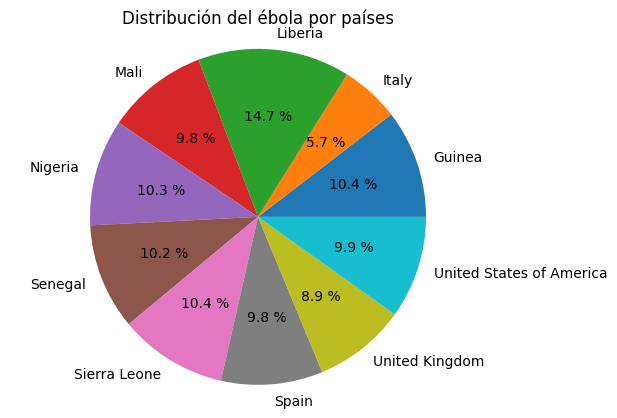

In [4]:
import matplotlib.pyplot as plt
plt.pie(cuantos['Conteo'],labels=cuantos['Country'],autopct='%0.1f %%')
plt.axis("equal")
plt.title("Distribución del ébola por países")
plt.savefig("Pastel_Paises.png",dpi=300,format='png')
plt.show()

In [5]:
SL

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
22/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
23/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16


In [6]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10]
NCD=SL['No. of confirmed deaths'][0:-1:10]

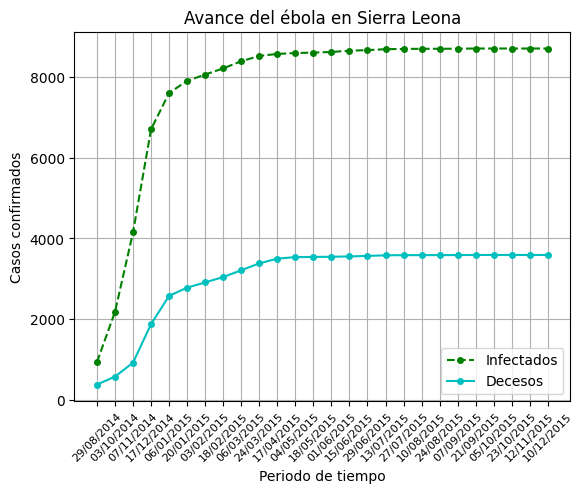

In [7]:
plt.plot(Dates,NCC,'o--g',ms=4,label='Infectados')
plt.plot(Dates,NCD,'o-c',ms=4,label='Decesos')
plt.grid()
plt.title('Avance del ébola en Sierra Leona')
plt.ylabel('Casos confirmados')
plt.xlabel('Periodo de tiempo')
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

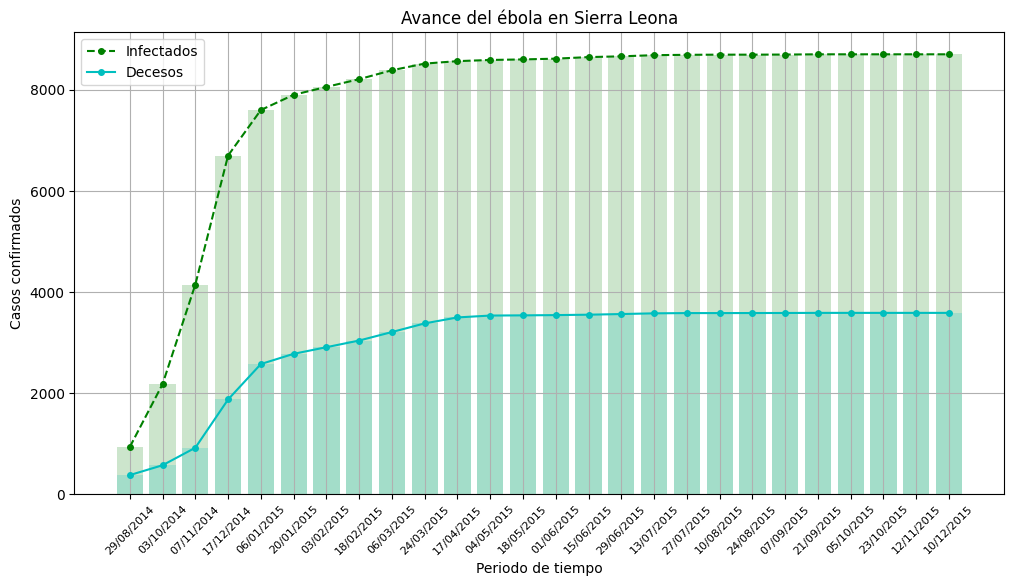

In [8]:
fig=plt.figure(figsize=(12,6))
plt.plot(Dates,NCC,'o--g',ms=4,label='Infectados')
plt.bar(Dates,NCC,color='g',alpha=0.2)
plt.plot(Dates,NCD,'o-c',ms=4,label='Decesos')
plt.bar(Dates,NCD,color='c',alpha=0.2)
plt.grid()
plt.title('Avance del ébola en Sierra Leona')
plt.ylabel('Casos confirmados')
plt.xlabel('Periodo de tiempo')
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.savefig("Barras_Paises.png",dpi=300,format='png')
plt.show()

In [9]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
SL['PIvsD']=PIvsD

<ipython-input-9-8a18c4adbf83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['PIvsD']=PIvsD


In [10]:
recuperados=((100-PIvsD)/100)*SL['No. of confirmed cases']
SL['recuperados']=recuperados

<ipython-input-10-50fb8d15610c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['recuperados']=recuperados


In [11]:
SL['PR']=(100-PIvsD)

<ipython-input-11-b3713d504f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['PR']=(100-PIvsD)


In [12]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,PR
Date,,,,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711,555.0,59.358289
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195,703.0,61.343805
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185,773.0,62.641815
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637,809.0,62.859363
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290,950.0,64.890710


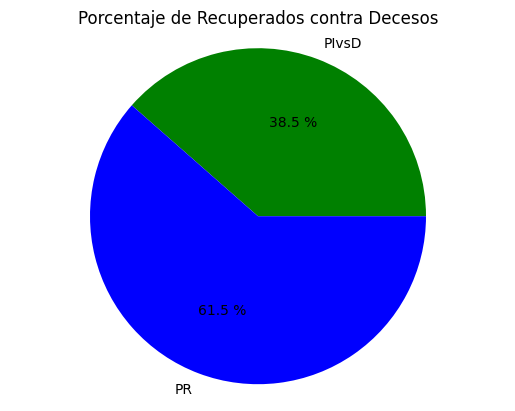

In [19]:
PIvsD_mean=SL['PIvsD'].mean()
PR_mean=SL['PR'].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=['PIvsD','PR']
plt.pie(porcentajes,labels=etiquetas,autopct='%0.1f %%',colors=['green','blue'])
plt.axis("equal")
plt.title("Porcentaje de Recuperados contra Decesos")
plt.show()